# Case Study

## Descrição & Objetivos


Este caso requer o desenvolvimento de uma segmentação de clientes para definir a estratégia de marketing. O
O conjunto de dados de amostra resume o comportamento de uso de cerca de 9.000 titulares de cartão de crédito ativos durante os últimos 6 meses. O arquivo está no nível do cliente com 18 variáveis ​​comportamentais.

Para cada segmento, eu devo sugerir de duas a três alavancas de resultados

## Variaveis

- cust_id = identificador do cliente
- balance = valor na conta para realizar compras
- balance_frenquecy = mostra a frequencia que o valor na conta é atualizado para fazer compras, esse valor varia de 0 a 1, sendo 1 muito frequente e 0 pouco frequente
- purchase = quantidade de compras feitas
- oneoff_purchase = o valor máximo feito em uma compra
- installments_purchases = valor das compras parceladas
- cash_advance = valor de saque de dinheiro utilizando o cartão de crédito
- purchase_frequency = mostra a frequencia que as compras são feitas, esse valor varia de 0 a 1, sendo 1 muito frequente e 0 pouco frequente
- oneoffpurchasefrequency= Com que frequência as compras acontecem de uma só vez (1 = comprado com frequência, 0 = não comprado com frequência)
- purchasesinstallmentsfrequency = Com que frequência as compras parceladas estão sendo feitas (1 = frequentemente feito, 0 = não feito com frequência)
- CASHADVANCEFREQUENCY = Com que frequência o dinheiro adiantado está sendo pago
- CASHADVANCETRX = Número de transações feitas com "Cash in Advanced"
- PURCHASES_TRX = Número de transações de compra feitas
- CREDIT_LIMIT = Limite de cartão de crédito para usuário
- PAGAMENTOS = Valor do pagamento feito pelo usuário
- MINIMUM_PAYMENTS = valor mínimo de pagamentos feitos pelo usuário
- PRCFULLPAYMENT = Porcentagem do pagamento integral pago pelo usuário
- ternure = Posse do serviço de cartão de crédito para o usuário


## Plano de Ação

**Sprint #0**
- Fazer o planejamento da solução (ok)
- Fazer o notebook end to end

**Sprint #1**
- Fazer a passo 01 - Data Description
    - Tratar os NAs das colunas: **minimum_payments** e **credit_limits**
- Fazer o passo 02 - Filtragem de Linhas e Colunas
- Fazer o passo 03 - Feature Engeneering
- Fazer o passo 04 - EDA (estudo de espaço)

**Sprint #2**
- Fazer a passo 05 - Data Preparation
- Fazer o passo 06 - Feature Selection
- Fazer o passo 07 - Hyperparameter Fine Tunning
- Fazer o passo 08 - Model Training

**Sprint #3**
- Fazer a passo 09 - Cluster Analysis
- Fazer o passo 10 - Model Production
- Fazer o dashboard

# 0.0 Imports

In [39]:
import inflection

import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

## 0.1 Helper Functions

## 0.2 Loading dataset

In [12]:
df_raw = pd.read_csv('../dados/data.csv')

# 1.0 Descrição dos Dados

In [13]:
df1 = df_raw.copy()

## 1.1 Rename Columns

In [14]:
df1.columns = [inflection.underscore(col) for col in df1.columns]

## 1.2 Data Dimensions

In [15]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Cols: {}'.format(df1.shape[1]))

Number of Rows: 8950
Number of Cols: 18


## 1.3 Check DTypes

In [16]:
df1.dtypes

cust_id                              object
balance                             float64
balance_frequency                   float64
purchases                           float64
oneoff_purchases                    float64
installments_purchases              float64
cash_advance                        float64
purchases_frequency                 float64
oneoff_purchases_frequency          float64
purchases_installments_frequency    float64
cash_advance_frequency              float64
cash_advance_trx                      int64
purchases_trx                         int64
credit_limit                        float64
payments                            float64
minimum_payments                    float64
prc_full_payment                    float64
tenure                                int64
dtype: object

## 1.4 Check NAs

In [17]:
df1.isna().sum()

cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

## 1.5 Fillout NAs

In [21]:
df1 = df1.dropna()

## 1.6 Change DTypes

## 1.7 Descriptive Statistical

# 2.0 Feature Engineering

In [22]:
df2 = df1.copy()

# 3.0 Filtragem de Linhas e Colunas

In [23]:
df3 = df2.copy()

# 4.0 EDA

In [26]:
df4 = df3.copy()

# 5.0 Data Preparation

In [27]:
df5 = df4.copy()

# 6.0 Feature Selection

In [28]:
df6 = df5.copy()

# 7.0 Hyperparameter Fine Tunning

In [33]:
X = df6.drop(columns=['cust_id'])

## 7.1 Metodo Elbow

In [35]:
variance = []

for k in range(2, 10):
    # model definition
    km = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)

    # model traning
    km.fit(X)

    # get variance
    variance.append(km.inertia_)

Text(0, 0.5, 'K')

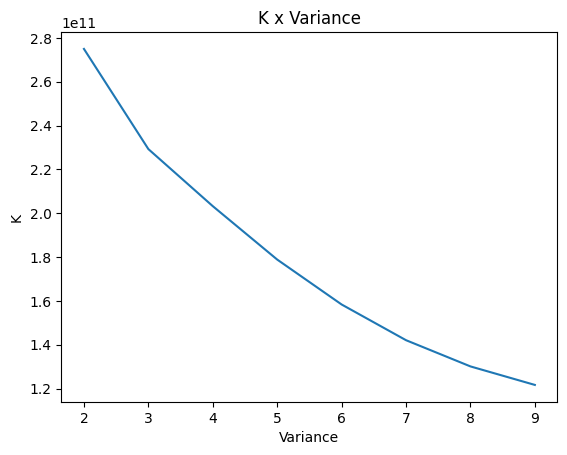

In [38]:
plt.plot(range(2, 10), variance)
plt.title('K x Variance')
plt.xlabel('Variance')
plt.ylabel('K')

# 8.0 Model Machine Learning

# 9.0 Cluster Analysis